In [82]:
import numpy as np
import matplotlib.pyplot as plt
from lumicks import pylake
import re

import glob
%matplotlib inline
dire='/mnt/d/OneDrive - Johns Hopkins University/Ha_CCarcamo/Data/Projects/SWR1 Project/2020-03-04-Cy5dCas9Cy3SWR1/'
files = glob.glob(dire+'*Kymograph*.h5')
print("molecule options:",end =" ")
for f in files:
    file = pylake.File(f)
    key = list(file.kymos.keys())[0]
    print(key,end =" ")
k=input("which molecule to look at? ")
for f in files:
    if re.search(r'\s' + k,f):
        filename=f
        print('opening '+filename)

molecule options: 1 10 DNA 6 11 DNA 7 12 DNA 8 13 DNA 8 14 DNA 8 15 DNA 9 16 DNA 9 17 DNA 9 SWR1 18 DNA 9 SWR1 19 DNA 9 SWR1 2 20 DNA 9 SWR1 21 DNA 9 SWR1 25 DNA 10 Cas9 sliding 26 DNA 11 27 DNA 11 SWR1 3 Cas9 sliding DNA 2 5 DNA 3 6 DNA 3 7 DNA 3 8 DNA 4 9 DNA 5 which molecule to look at? 3 Cas9 sliding DNA 2
opening /mnt/d/OneDrive - Johns Hopkins University/Ha_CCarcamo/Data/Projects/SWR1 Project/2020-03-04-Cy5dCas9Cy3SWR1/20200304-183136 Kymograph 3 Cas9 sliding DNA 2.h5


In [83]:
# open file
# dire='/mnt/d/OneDrive - Johns Hopkins University/Ha_CCarcamo/Data/C_Trap/2019-08-23 guide 32 taylor ATTO 550 lambda DNA/'
# file = pylake.File(dire+'20190823-192257 Kymograph 1 nonspecifically bound Cas9 ATTO 550.h5')
file = pylake.File(filename)
kymos = list(file.kymos)
kymo_data = file.kymos[kymos[0]]
kymo = file.kymos[kymos[0]]

In [29]:
for x in dir(kymo):
    print(x)

__class__
__delattr__
__dict__
__dir__
__doc__
__eq__
__format__
__ge__
__getattribute__
__gt__
__hash__
__init__
__init_subclass__
__le__
__lt__
__module__
__ne__
__new__
__reduce__
__reduce_ex__
__repr__
__setattr__
__sizeof__
__str__
__subclasshook__
__weakref__
_cache
_get_photon_count
_image
_plot
_plot_color
_timestamps
blue_image
blue_photon_count
file
green_image
green_photon_count
has_fluorescence
has_force
infowave
json
name
pixels_per_line
plot_blue
plot_green
plot_red
plot_rgb
red_image
red_photon_count
rgb_image
save_tiff
start
stop
timestamps


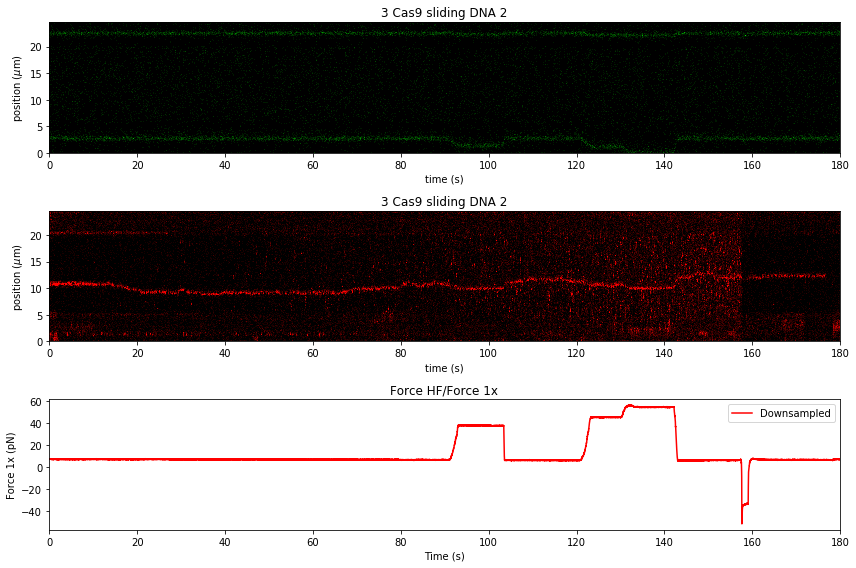

In [88]:
# Without time slicing

fig = plt.figure(figsize=(12,8))
# """
plt.subplot(3,1,1)
kymo.plot_green(vmax=10,vmin=-0,aspect='auto')   #this is the best looking vmax/vmin combo so far
# kymo.plot_green(aspect='auto')   #this is the best looking vmax/vmin combo so far
plt.subplot(3,1,2)
# """
# plt.subplot(2,1,1)
kymo.plot_red(vmax=10,vmin=-0,aspect='auto')   #this is the best looking vmax/vmin combo so far
# kymo.plot_red(aspect='auto')   #this is the best looking vmax/vmin combo so far


plt.subplot(3,1,3)
# plt.subplot(2,1,2)


# """"
# Force in the x direction (pN)
forcex = file['Force HF']['Force 1x']
# time traces (seconds)
time = forcex.timestamps/1e9
time = time - time[0]
sample_rate = forcex.sample_rate
downsampled_rate = 100 # Hz
# downsample the force, nanostage position and time
forcex_downsamp = forcex.downsampled_by(int(sample_rate/downsampled_rate))
time_downsamp = forcex_downsamp.timestamps/1e9
time_downsamp = time_downsamp - time_downsamp[0]
forcex.plot(label="Original")
forcex_downsamp.plot(color='r',label="Downsampled")
plt.ylabel('Force 1x (pN)')
plt.xlim([0,max(time)])
plt.legend()
plt.tight_layout()
# """"
#if you want to save
# plt.savefig(dire+'kymo+force-'+k+'.png')

IndexError: index 0 is out of bounds for axis 0 with size 0

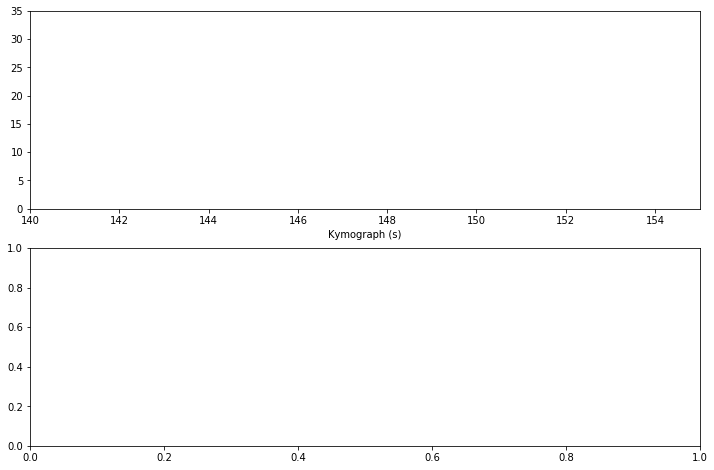

In [70]:
# My attempts at time slicing
fig = plt.figure(figsize=(12,8))
st = 140
et = 155

plt.subplot(2,1,1)
# redi = kymo.red_image;
# c = [False]*0 + [True]*50 # This is the problem, I am just out of ideas how to fix it
# d = np.compress(c, redi, axis=1)
# plt.imshow(d)
# kymo.plot_red(vmax=120,vmin=-30,aspect='auto')   #this is the best looking vmax/vmin combo so far

# ================================

# Get relative timestamps of the kymograph
rel_ts = (kymo.timestamps[0] - kymo.timestamps[0][0])/1e9
# Slice the kymograph red image from 0 to 50s
redi = kymo.red_image[:, (rel_ts > st) & (rel_ts < et)];

# Plot the red channel (for different channels check: 
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.imshow.html
#)
plt.imshow(redi,cmap="Reds_r", extent=[st,et,0,35],vmax=400,vmin=50, aspect='auto')
plt.xlabel('Kymograph (s)')
# ===================================

plt.subplot(2,1,2)
# Force in the x direction (pN)
forcex = file['Force HF']['Force 1x'][(str(st)+'s'):(str(et)+'s')]
# time traces (seconds)
time = forcex.timestamps/1e9
time = time - time[0]
sample_rate = forcex.sample_rate
downsampled_rate = 100 # Hz
# downsample the force, nanostage position and time
forcex_downsamp = forcex.downsampled_by(int(sample_rate/downsampled_rate))
time_downsamp = forcex_downsamp.timestamps/1e9
time_downsamp = time_downsamp - time_downsamp[0]
forcex.plot(label="Original")
forcex_downsamp.plot(color='r',label="Downsampled")
plt.ylabel('Force 1x (pN)')
plt.xlim([0,max(time)])
# plt.xlim([st,et])
plt.legend()
plt.tight_layout()

#if you want to save
# plt.savefig(dire+'kymo+force '+str(st)+' to '+str(et)+' sec c -'+k+'.png')